In [5]:
import pandas as pd

In [6]:
dataset=pd.read_csv("feetdistance.csv")
dataset.keys()

Index(['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3',
       ...
       'z31', 'v31', 'x32', 'y32', 'z32', 'v32', 'x33', 'y33', 'z33', 'v33'],
      dtype='object', length=133)

In [7]:
X=dataset.drop(['class'],axis=1)
y=dataset[['class']]
X.shape

(2669, 132)

In [8]:
df2 = len(dataset[dataset["class"]=="feet_dist_normal"])
df2

1078

In [35]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(2669, 9)

In [36]:
X_pca

array([[-1.59885719e+00,  8.77798323e-01,  1.60002570e+00, ...,
        -2.62498252e-01,  4.18624129e-03,  2.48874220e-01],
       [-1.58652831e+00,  5.31353724e-01,  1.53672532e+00, ...,
        -3.14771153e-01,  1.03467635e-01,  2.14448285e-01],
       [-1.37006323e+00, -2.62918619e-01,  9.75567306e-01, ...,
        -6.76003875e-01, -6.21640961e-04,  2.03247981e-01],
       ...,
       [-1.18156485e+00,  7.89173709e-01, -4.10030449e-01, ...,
         1.06222920e+00, -2.97862292e-01,  5.05032092e-01],
       [-1.18436100e+00,  8.08039807e-01, -1.07668881e-02, ...,
         1.12579712e+00, -2.49707499e-01,  6.52759655e-01],
       [-1.15843713e+00,  8.96230044e-01,  4.11249402e-01, ...,
         1.07878103e+00, -3.47871122e-01,  7.19253735e-01]])

In [37]:
from sklearn.preprocessing import OrdinalEncoder
y_encoded = OrdinalEncoder().fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y_encoded,test_size=0.2)

In [39]:
import xgboost as xgb

In [40]:
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, seed=1729)
m2_xgb.fit(X_train, y_train, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [41]:
y_predicted = m2_xgb.predict(X_test)

<module 'matplotlib.pyplot' from 'C:\\Users\\sagar\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

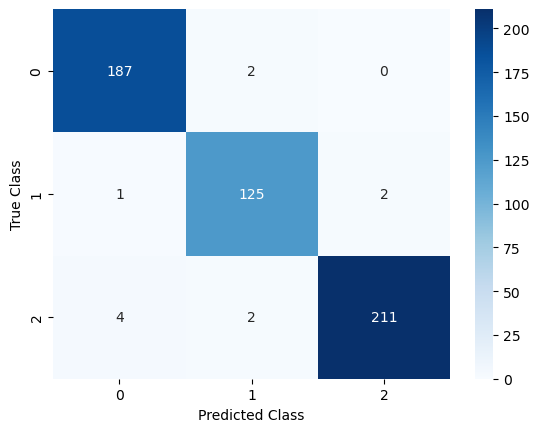

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_predicted)
# plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True,cmap="Blues", fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt

In [46]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","merror"]
%time m2_xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-auc:0.98989	validation_0-merror:0.06511	validation_1-auc:0.98322	validation_1-merror:0.08427
[1]	validation_0-auc:0.99142	validation_0-merror:0.05105	validation_1-auc:0.98675	validation_1-merror:0.07491
[2]	validation_0-auc:0.99420	validation_0-merror:0.04731	validation_1-auc:0.98990	validation_1-merror:0.07116
[3]	validation_0-auc:0.99482	validation_0-merror:0.05105	validation_1-auc:0.99027	validation_1-merror:0.07303
[4]	validation_0-auc:0.99608	validation_0-merror:0.04262	validation_1-auc:0.99118	validation_1-merror:0.07116
[5]	validation_0-auc:0.99683	validation_0-merror:0.04122	validation_1-auc:0.99167	validation_1-merror:0.06180
[6]	validation_0-auc:0.99729	validation_0-merror:0.03981	validation_1-auc:0.99217	validation_1-merror:0.05805
[7]	validation_0-auc:0.99781	validation_0-merror:0.03607	validation_1-auc:0.99328	validation_1-merror:0.05431
[8]	validation_0-auc:0.99813	validation_0-merror:0.03513	validation_1-auc:0.99334	validation_1-merror:0.05243
[9]	valida

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.99999	validation_0-merror:0.00187	validation_1-auc:0.99748	validation_1-merror:0.03371
[28]	validation_0-auc:0.99999	validation_0-merror:0.00141	validation_1-auc:0.99755	validation_1-merror:0.03184
[29]	validation_0-auc:0.99999	validation_0-merror:0.00141	validation_1-auc:0.99767	validation_1-merror:0.03184
[30]	validation_0-auc:1.00000	validation_0-merror:0.00094	validation_1-auc:0.99769	validation_1-merror:0.02622
[31]	validation_0-auc:1.00000	validation_0-merror:0.00094	validation_1-auc:0.99770	validation_1-merror:0.02809
[32]	validation_0-auc:1.00000	validation_0-merror:0.00094	validation_1-auc:0.99783	validation_1-merror:0.02809
[33]	validation_0-auc:1.00000	validation_0-merror:0.00047	validation_1-auc:0.99779	validation_1-merror:0.02809
[34]	validation_0-auc:1.00000	validation_0-merror:0.00094	validation_1-auc:0.99778	validation_1-merror:0.02809
[35]	validation_0-auc:1.00000	validation_0-merror:0.00094	validation_1-auc:0.99781	validation_1-merror:0.02996
[

[101]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99838	validation_1-merror:0.02060
[102]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99837	validation_1-merror:0.02060
[103]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99840	validation_1-merror:0.02060
[104]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99838	validation_1-merror:0.02247
[105]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99839	validation_1-merror:0.02247
[106]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99834	validation_1-merror:0.02247
[107]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99837	validation_1-merror:0.02247
[108]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99836	validation_1-merror:0.02247
[109]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99838	validation_1-merror:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [47]:
result = m2_xgb.evals_result()
epochs = len(result['validation_0']['merror'])
x_axis = range(0, epochs)

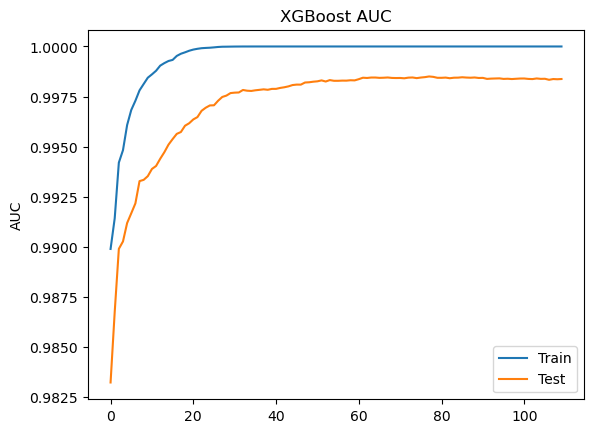

In [48]:
import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, result['validation_0']['auc'], label='Train')
ax.plot(x_axis, result['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [49]:
predictions = m2_xgb.predict(X_test)
from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9794007490636704

In [50]:
y

,class
0,feet_dist_high
1,feet_dist_high
2,feet_dist_high
3,feet_dist_high
4,feet_dist_high
...,...
2664,feet_dist_low
2665,feet_dist_low
2666,feet_dist_low
2667,feet_dist_low


In [51]:
y_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])